In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import igraph
import math
from igraph import *
import matplotlib.pyplot as plt

In [3]:
g_l = Graph.Lattice(dim = [5,5,5], mutual = False, circular = False)

In [4]:
layout = g_l.layout('circle')

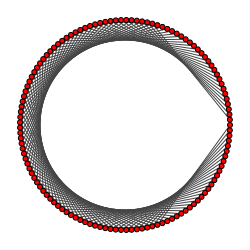

In [5]:
plot(g_l, layout=layout, bbox=(250,250), vertex_size = 5)

In [6]:
layout = g_l.layout('fruchterman_reingold')

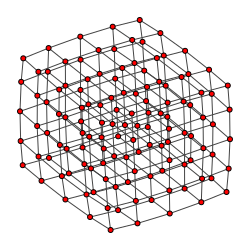

In [7]:
plot(g_l, layout=layout, bbox=(250,250), vertex_size = 5)

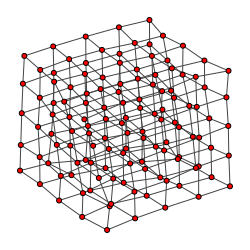

In [8]:
layout = g_l.layout('kamada_kawai')
plot(g_l, layout = layout, bbox=(250,250), vertex_size = 5)

In [9]:
g_tree = Graph([(0,1),(0,2),(0,3),(1,4),(1,5),(1,6),(2,7),(2,8),(3,9)], directed=True)

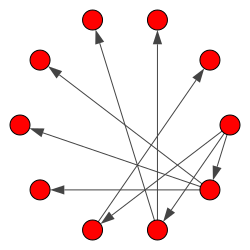

In [10]:
plot(g_tree, layout = g_tree.layout('circle'), bbox=(250,250))

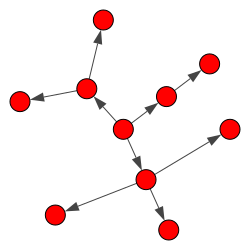

In [11]:
plot(g_tree, layout = g_tree.layout('reingold_tilford_circular'), bbox=(250,250))

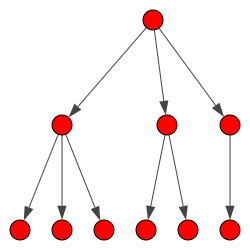

In [12]:
plot(g_tree, layout = g_tree.layout('reingold_tilford'), bbox=(250,250))

In [13]:
g_bip = Graph.Formula('actor1:actor2:actor3, movie1:movie2, actor1:actor2 -- movie1, actor2:actor3 -- movie2')
g_bip.vs['type']=['movie' in i for i in g_bip.vs['name']]

In [14]:
color_dict = {True:'red', False:'cyan'}

In [15]:
shape_dict = {True:'rectangle', False:'circle'}

In [16]:
g_bip.vs["color"] = [color_dict[t] for t in g_bip.vs["type"]]
g_bip.vs['shape'] = [shape_dict[t] for t in g_bip.vs['type']]

In [17]:
layout = g_bip.layout_bipartite(types='type')

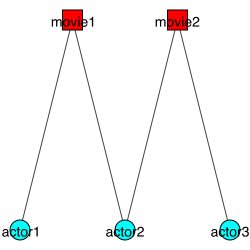

In [18]:
plot(g_bip, bbox=(250,250), layout = layout, vertex_label = g_bip.vs['name'])

karate club data 만들기

In [19]:
g_karate = Graph.Formula('Mr_Hi -- Actor2:Actor3:Actor4:Actor5:Actor6:Actor7:Actor8:Actor9:Actor11:Actor12:Actor13:Actor14:Actor18:Actor20:Actor22:Actor32, \
                         Actor2 -- Mr_Hi:Actor3:Actor4:Actor8:Actor14:Actor18:Actor20:Actor22:Actor31, \
                         Actor3 -- Mr_Hi:Actor2:Actor4:Actor8:Actor9:Actor10:Actor14:Actor28:Actor29:Actor33, \
                         Actor4 -- Mr_Hi:Actor2:Actor3:Actor8:Actor13:Actor14, \
                         Actor5 -- Mr_Hi:Actor7:Actor11, \
                         Actor6 -- Mr_Hi:Actor7:Actor11:Actor17, \
                         Actor7 -- Mr_Hi:Actor5:Actor6:Actor17, \
                         Actor8 -- Mr_Hi:Actor2:Actor3:Actor4, \
                         Actor9 -- Mr_Hi:Actor3:Actor31:Actor33:John_A, \
                         Actor10 -- Actor3:John_A, \
                         Actor11 -- Mr_Hi:Actor5:Actor6, \
                         Actor12 -- Mr_Hi, \
                         Actor13 -- Mr_Hi:Actor4, \
                         Actor14 -- Mr_Hi:Actor2:Actor3:Actor4:John_A, \
                         Actor15 -- Actor33:John_A, \
                         Actor16 -- Actor33:John_A, \
                         Actor17 -- Actor6:Actor7, \
                         Actor18 -- Mr_Hi:Actor2, \
                         Actor19 -- Actor33:John_A, \
                         Actor20 -- Mr_Hi:Actor2:John_A, \
                         Actor21 -- Actor33:John_A, \
                         Actor22 -- Mr_Hi:Actor2, \
                         Actor23 -- Actor33:John_A, \
                         Actor24 -- Actor26:Actor28:Actor30:Actor33:John_A, \
                         Actor25 -- Actor26:Actor28:Actor32, \
                         Actor26 -- Actor24:Actor25:Actor32, \
                         Actor27 -- Actor30:John_A, \
                         Actor28 -- Actor3:Actor24:Actor25:John_A, \
                         Actor29 -- Actor3:Actor32:John_A, \
                         Actor30 -- Actor24:Actor27:Actor33:John_A, \
                         Actor31 -- Actor2:Actor9:Actor33:John_A, \
                         Actor32 -- Mr_Hi:Actor25:Actor26:Actor29:Actor33:John_A, \
                         Actor33 -- Actor3:Actor9:Actor15:Actor16:Actor19:Actor21:Actor23:Actor24:Actor30:Actor31:Actor32:John_A, \
                         John_A -- Actor9:Actor10:Actor14:Actor15:Actor16:Actor19:Actor20:Actor21:Actor23:Actor24:Actor27:Actor28:Actor29:Actor30:Actor31:Actor32:Actor33'
                        )

In [20]:
#vertex label 설정
g_karate.vs['label'] = [name.replace('Actor', '') for name in g_karate.vs['name']]


#vertex faction 설정
faction1_list = ['Mr_Hi', 'Actor2', 'Actor3', 'Actor4', 'Actor5', 
                 'Actor6', 'Actor7', 'Actor8', 'Actor11', 'Actor12',
                 'Actor13', 'Actor14', 'Actor17', 'Actor18', 'Actor20', 'Actor22']

g_karate.vs['Faction'] = 1
faction_list = []

for word in g_karate.vs['name']:
    if word in faction1_list:
        faction_list.append(1)
    else:
        faction_list.append(2)
        
g_karate.vs['Faction'] = faction_list


#edge weight 설정
g_karate.es['weight'] = [4, 5, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 6, 3, 4, 5, 1, 2, 2, 2, 3, 4, 5, 1, 3, 2, 2, 2, 3, 3, 3, 
 2, 3, 5, 3, 3, 3, 3, 3, 4, 2, 3, 3, 2, 3, 4, 1, 2, 1, 3, 1, 2, 3, 5, 4, 3, 5, 4, 2, 3, 2, 7, 4, 2, 4, 2,
 2, 4, 2, 3, 3, 4, 4, 5]

Karate club data 시각화

In [21]:
#vertex shape 설정

#Mr_Hi, John_A: 사각형, 나머지: circle
g_karate.vs['shape'] = ''
search = ['Mr_Hi', 'John_A']
shape_list = []


for word in g_karate.vs['label']:
    if word in search:
        shape_list.append('rectangle')
    else:
        shape_list.append('circle')

        
g_karate.vs['shape'] = shape_list

In [22]:
#vertex color 설정

g_karate.vs['color'] = ''
color_list = []

for f in g_karate.vs['Faction']:
    if f==1:
        color_list.append('red')
    else:
        color_list.append('dodgerblue')

g_karate.vs['color'] = color_list

In [23]:
#vertex size 설정

g_karate.vs['size'] = 1
g_karate.vs['size2'] = 1


size_list = []
size_list2 = []


strength_list = g_karate.strength(weights = g_karate.es['weight'])

for i in strength_list:
    value1 = 4*math.sqrt(i)
    value2 = 2*math.sqrt(i)
    size_list.append(value1)
    size_list2.append(value2)

g_karate.vs['size'] = size_list
g_karate.vs['size2'] = size_list2

In [24]:
#edge width 설정

g_karate.es['width'] = g_karate.es['weight']

In [25]:
#edge color 설정
#Faction1 - Faction1 : pink
#Faction2 - Faction2 : lightblue
#Faction1 - Faction2 : yellow

F1 = []
F2 = []

for i in range(len(g_karate.vs)):
    if g_karate.vs['Faction'][i] == 1:
        F1.append(i)
    else:
        F2.append(i)
        
g_karate.es['color'] = 'yellow'
g_karate.es.select(_between = (F1,F1))['color']='pink'
g_karate.es.select(_between = (F2,F2))['color']='lightblue'

In [26]:
#vertex_label_dist 설정

g_karate.vs['label_dist'] = 0.75

g_karate.vs.select(size_ge = 10)['label_dist'] = 0 #ge = greater or equal than 
#vertex size가 10보다 작은 경우 label이 안 보일 수도 있기 때문에 위치를 조정해줌

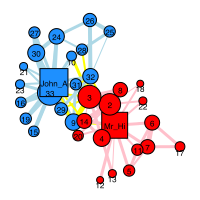

In [27]:
plot(g_karate, bbox=(200,200), vertex_label_size=8)

Faction1, 2 나눠서 plot 그리기

In [28]:
k1_vs = g_karate.vs[g_karate.neighborhood(0)] #Faction 1 그룹
k2_vs = g_karate.vs[g_karate.neighborhood(23)] #Faction 2 그룹

In [29]:
k1_g = g_karate.subgraph(k1_vs)
k2_g = g_karate.subgraph(k2_vs)

In [30]:
g1 = plot(k1_g, bbox=(200,200), vertex_label=None, vertex_color=['red']+['lightblue']*16)

g2 = plot(k2_g, bbox=(200,200), vertex_label=None, vertex_color=['lightblue']*9+['red']+['lightblue']*8)

In [31]:
#한 페이지에 여러개를 그리기 위한 package들
import os
from IPython.display import display, Image

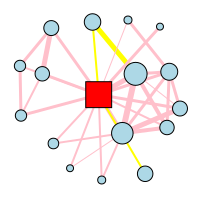

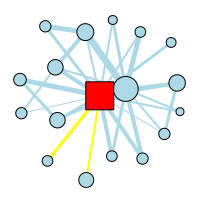

In [32]:
for i in [g1,g2]:
    i.save('temporary.png')
    display(Image(filename='temporary.png'))
    os.remove('temporary.png')

Large Group data 시각화

In [33]:
n_vertices = 3264

# Create graph
g = Graph()

# Add vertices
g.add_vertices(n_vertices)

edges = []
weights = []

with open("citeseer.edges", "r") as edges_file:
    line = edges_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")
        
        # Add edge to edge list
        edges.append(((int(strings[0])-1), (int(strings[1])-1)))
        
        # Add weight to weight list
        weights.append(float(strings[2]))
        
        
        line = edges_file.readline()

# Add edges to the graph
g.add_edges(edges)

# Add weights to edges in the graph
g.es['weight'] = weights

In [34]:
n_classes = 6

bins = [[] for x in range(n_classes)]

with open("citeseer.node_labels", "r") as labels_file:
    line = labels_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")
        
        vertex_id = int(strings[0])-1
        bin_id = int(strings[1])-1
        bins[bin_id].append(vertex_id)
        
        line = labels_file.readline()

In [35]:
group_list = []
group_color = []
group_number = []

for i in range(n_vertices):
    if i in bins[0]:
        group_list.append('group1')
        group_color.append('green')
        group_number.append(0)
    elif i in bins[1]:
        group_list.append('group2')
        group_color.append('yellow')
        group_number.append(1)
    elif i in bins[2]:
        group_list.append('group3')
        group_color.append('red')
        group_number.append(2)
    elif i in bins[3]:
        group_list.append('group4')
        group_color.append('blue')
        group_number.append(3)
    elif i in bins[4]:
        group_list.append('group5')
        group_color.append('orange')
        group_number.append(4)
    elif i in bins[5]:
        group_list.append('group6')
        group_color.append('pink')
        group_number.append(5)
    else:
        group_list.append('group7')
        group_color.append('grey')
        group_number.append(6)


g.vs["group"] = group_list
g.vs['color'] = group_color
g.vs['number'] = group_number

시각화

In [36]:
layout = g.layout('drl')

In [37]:
plot(g, layout = layout ,vetex_label=None, vertex_size=3, bbox=(300,300))

group 별로 묶어서 시각화

In [38]:
g_c = g.copy()
g_c.contract_vertices(mapping = g_c.vs['number'])

In [39]:
#weight 초기화
g_c.es['weight'] = 1

In [40]:
g_c = g_c.simplify(combine_edges = sum) #sum --> edge의 weight를 더해줌.

In [41]:
#group 크기 

group_set = ['group1', 'group2', 'group3', 'group4', 'group5', 'group6']
group_size = []


for i in group_set:
    group_size.append(g.vs['group'].count(i))

group_size

[240, 590, 681, 502, 666, 585]

In [42]:
g_c.vs['group'] = group_set

In [43]:
#group size --> vertex size에 반영
#edge weight --> edge width에 반영

vs_size = []
es_width = []

for i in group_size:
    value = 0.6*math.sqrt(2*i)
    vs_size.append(value)

for i in g_c.es['weight']:
    value = 0.5*math.sqrt(i)
    es_width.append(value)
    
g_c.vs['size'] = vs_size
g_c.es['width'] = es_width

In [44]:
#group 별 color 설정

color_dict = {'group1': 'green',
              'group2': 'yellow',
              'group3': 'red',
              'group4': 'blue',
              'group5': 'orange',
              'group6': 'pink'}
g_c.vs['color'] = [color_dict[group] for group in g_c.vs['group']]

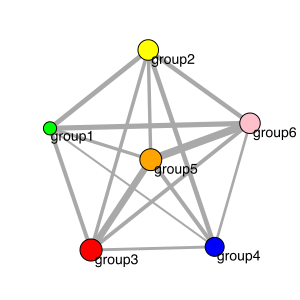

In [45]:
plot(g_c, vertex_label = group_set, 
     vertex_label_dist = 1, vertex_label_angle=-0.4,
     edge_arrow_size = 0, edge_color='dark grey',
     bbox=(300,300), margin=50)